##Desafio Cientista de Dados

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema. O uso de outras fontes de dados além do dataset é permitido (e encorajado). Você poderá encontrar em anexo um dicionário dos dados.


###Análise Exploratória de Dados

1.	Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv("teste_indicium_precificacao.csv")

In [21]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [23]:
print(f"Quantidade de linhas e colunas: {df.shape}")

Quantidade de linhas e colunas: (48894, 16)


In [25]:
print(df.isna().sum())

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


In [28]:
df = df.dropna()
print(f"Quantidade de linhas e colunas: {df.shape}")

Quantidade de linhas e colunas: (38820, 16)


In [30]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,3.882000e+04,3.882000e+04,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000
mean,1.810127e+07,6.424747e+07,40.728131,-73.951148,142.332354,5.869346,29.290778,1.373259,5.166589,114.879856
std,1.069347e+07,7.589779e+07,0.054990,0.046693,196.997290,17.389233,48.183410,1.680339,26.303293,129.525398
min,2.595000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.722029e+06,7.032517e+06,40.688640,-73.982462,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887339e+07,2.837143e+07,40.721710,-73.954805,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756792e+07,1.019092e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [29]:
bairro_grupo_counts = df['bairro_group'].value_counts()
print(bairro_grupo_counts)

bairro_group
Manhattan        16621
Brooklyn         16438
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64


Podemos analisar que esse dataset apresenta 48894 linhas com 16 colunas, sendo 3 do tipo float64, 7 do tipo int64, 6 do tipo object, onde temos valores ausentes nas colunas nome, host_name, ultima_review e reviews_por_mes.

Após realizar a exclusão dos dados com valores ausentes o mesmo dataset com 38820 linhas e 16 colunas

Apresentamos uma média de $ 142,33 por diária, onde a média do mínimo de noites utilizadas fica entre 5 noites e o local apresenta uma média durante o ano de disponibilidade de 114 dias.


### Verificando correlação entre variáveis

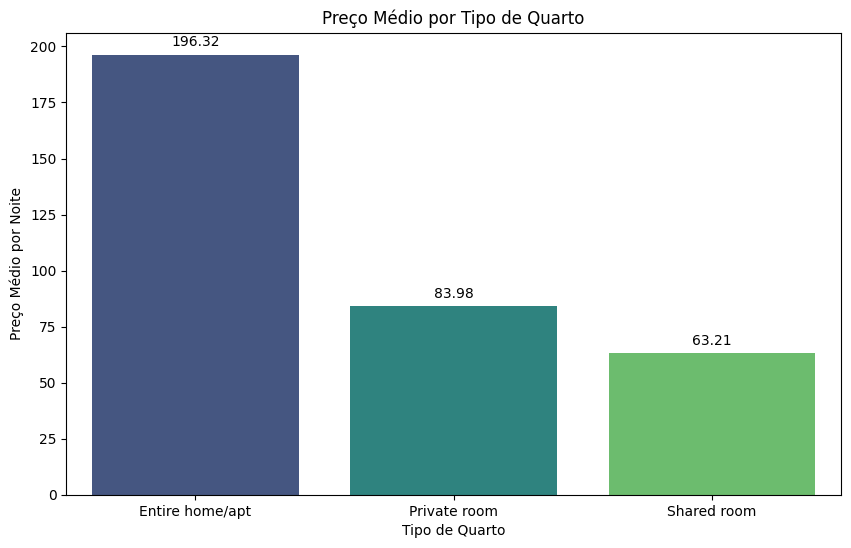

In [31]:
preco_medio_por_tipo = df.groupby('room_type')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='room_type', y='price', data=preco_medio_por_tipo, palette='viridis')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Preço Médio por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço Médio por Noite')
plt.show()

Com base na análise dos dados e na visualização apresentada, observamos que há uma variação significativa nos preços médios por noite dependendo do tipo de acomodação.


As casas/apartamentos inteiros têm um preço médio mais alto (196,32), seguidos pelos quartos privados (83,98) e quartos compartilhados (63,21). Essa diferença nos preços reflete a variedade de opções de hospedagem disponíveis e suas respectivas ofertas de privacidade e comodidade.

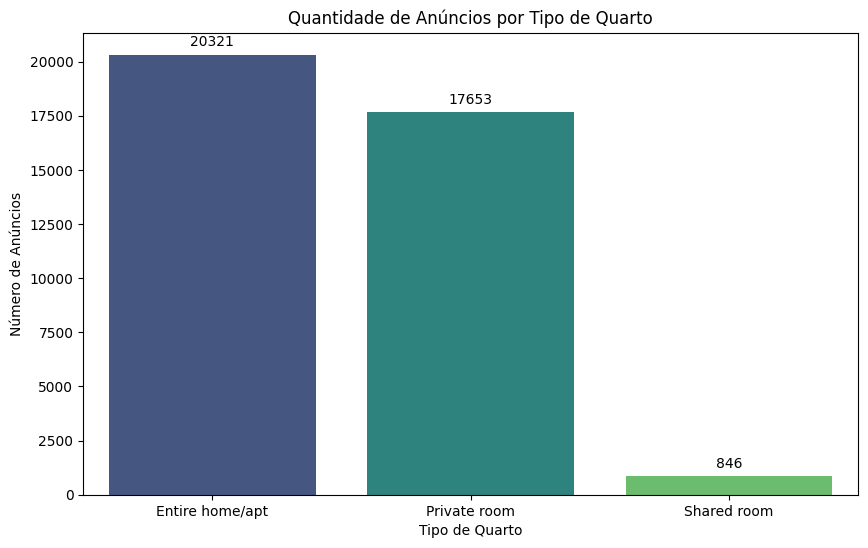

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index, palette='viridis')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Quantidade de Anúncios por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Número de Anúncios')
plt.show()


A análise dos dados sobre a quantidade de anúncios por tipo de quarto mostra uma distribuição clara no mercado de acomodações para "Entire home/apt" (Casa/Apartamento completo), "Private room" (Quarto privado) e "Shared room" (Quarto compartilhado):



*   Entire home/apt (Casa/Apartamento completo): Com 20321 anúncios, é a categoria mais anunciada, indicando alta oferta e potencialmente maior retorno financeiro.

*   Private room (Quarto privado): Com 17653 anúncios, esta categoria oferece uma opção intermediária, proporcionando privacidade a um custo potencialmente menor.


*   Shared room (Quarto compartilhado): Com 846 anúncios, é a categoria menos anunciada, possivelmente refletindo menor demanda ou atratividade para os proprietários.


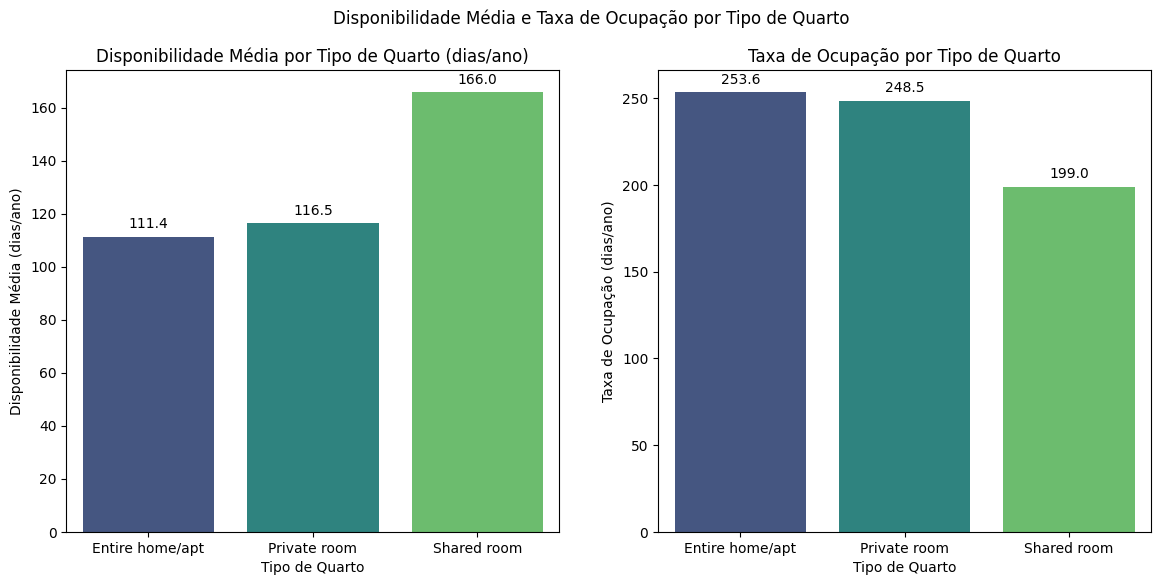

In [33]:
df['disponibilidade_media'] = df.groupby('room_type')['disponibilidade_365'].transform('mean')
df['taxa_ocupacao'] = 365 - df['disponibilidade_365']

disponibilidade_media = df.groupby('room_type')['disponibilidade_media'].mean()
taxa_ocupacao = df.groupby('room_type')['taxa_ocupacao'].mean()

palette = 'viridis'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_title('Disponibilidade Média por Tipo de Quarto (dias/ano)')
ax1.set_xlabel('Tipo de Quarto')
ax1.set_ylabel('Disponibilidade Média (dias/ano)')
bars1 = sns.barplot(x=disponibilidade_media.index, y=disponibilidade_media, palette=
                    palette, ax=ax1)
ax1.tick_params(axis='y')

for p in bars1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points')

ax2.set_title('Taxa de Ocupação por Tipo de Quarto')
ax2.set_xlabel('Tipo de Quarto')
ax2.set_ylabel('Taxa de Ocupação (dias/ano)')
bars2 = sns.barplot(x=taxa_ocupacao.index, y=taxa_ocupacao, palette=palette, ax=ax2)
ax2.tick_params(axis='y')

for p in bars2.patches:
    ax2.annotate(format(p.get_height(), '.1f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points')

fig.suptitle('Disponibilidade Média e Taxa de Ocupação por Tipo de Quarto')

plt.show()


A análise da disponibilidade média por tipo de quarto revela algumas percepções interessantes sobre a dinâmica do mercado de hospedagem:


*   Entire home/apt (Casa/Apartamento inteiro): Disponibilidade média de 111,4 dias por ano, sugerindo uma demanda estável para acomodações completas que oferecem maior privacidade e espaço.

*   Private room (Quarto privado): Disponibilidade média de 116,5 dias por ano, indicando que quartos privados são igualmente procurados, oferecendo um bom equilíbrio entre custo e privacidade.

*   Shared room (Quarto compartilhado): Disponibilidade média significativamente maior, com 166 dias por ano, possivelmente devido à menor demanda por quartos compartilhados.

Já quanto a taxa de ocupação por tipo de quarto, observamos as seguintes tendências:

*   Entire home/apt: 253,6 dias

*   Private room: 248,5

*   Shared room: 199 dias

<br>

Concluímos desse modo que Entire home/apt (Casa/Apartamento inteiro) e Private room (Quarto privado) têm disponibilidades médias e taxas de ocupação similares, sugerindo popularidade equivalente. Já
Shared room (Quarto compartilhado) apresenta maior disponibilidade média e menor taxa de ocupação, indicando menor demanda.




###2.	Responda também às seguintes perguntas:

###a.	Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?



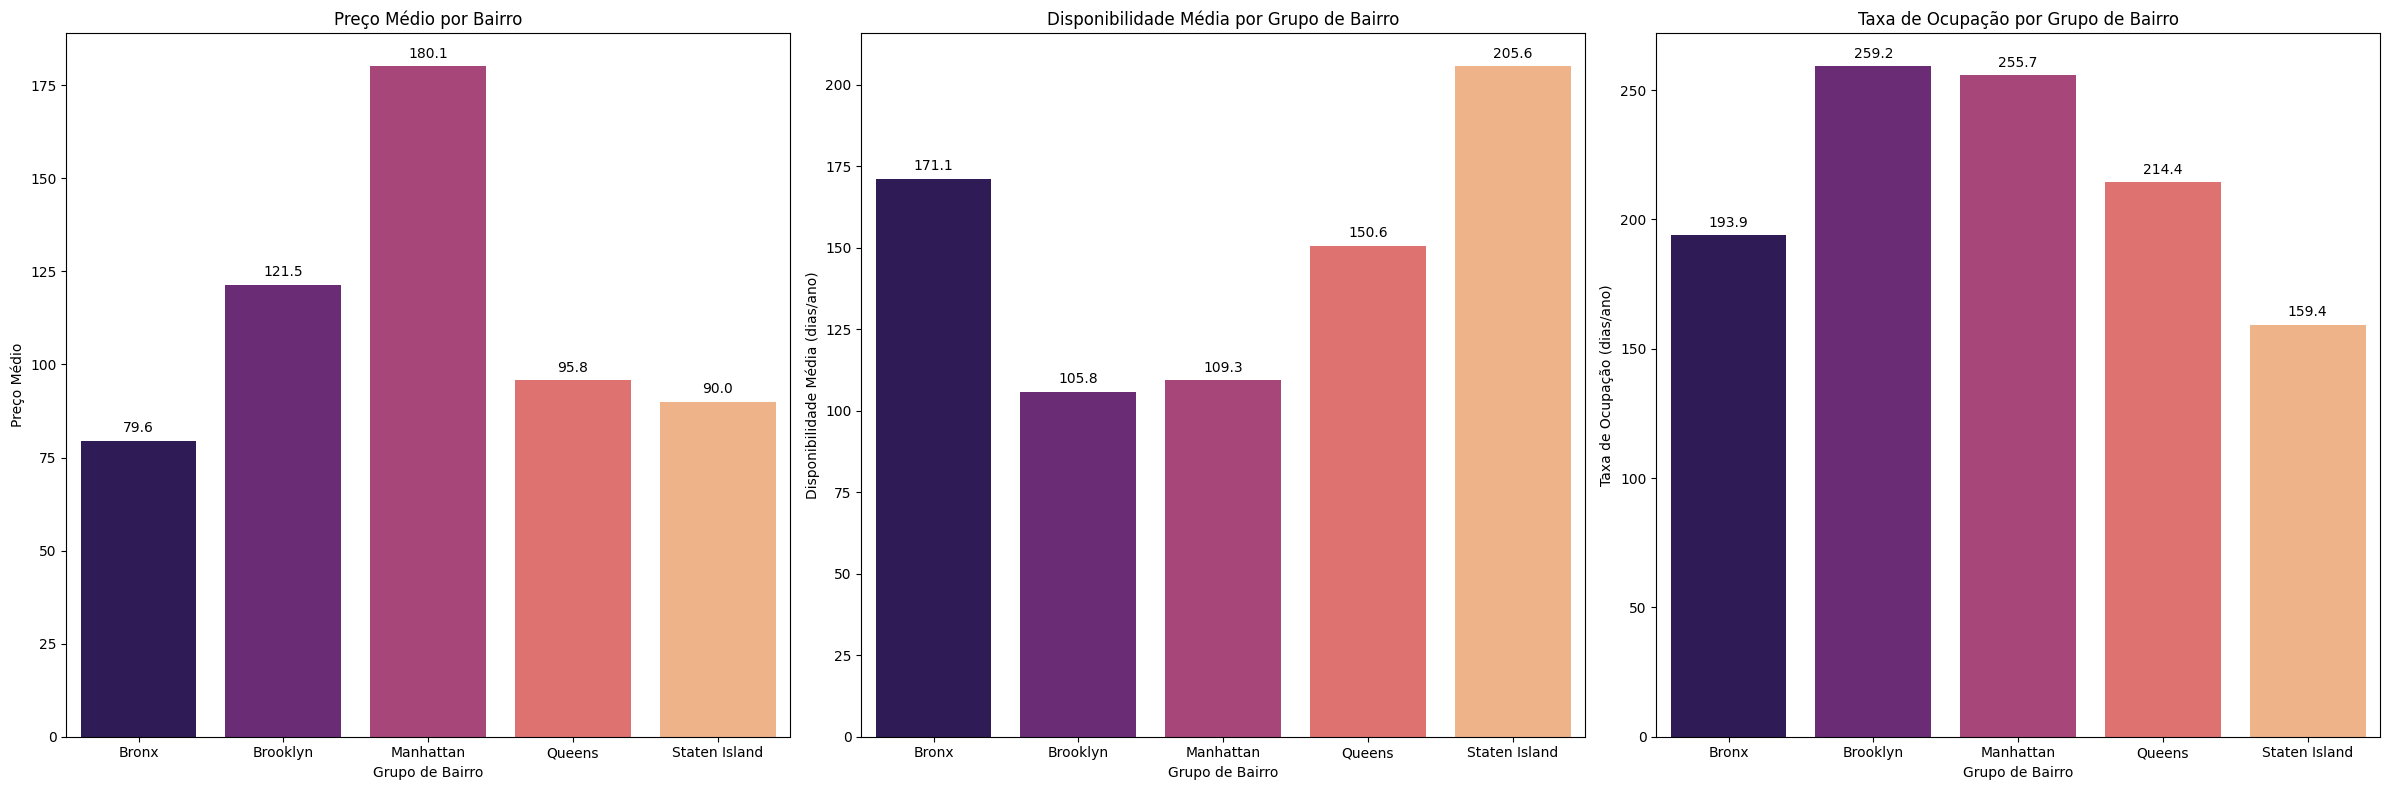

In [34]:
df['taxa_ocupacao'] = 365 - df['disponibilidade_365']

bairro_preco_disponibilidade= df.groupby('bairro_group').agg({
    'price': 'mean',
    'disponibilidade_365': 'mean',
    'taxa_ocupacao': 'mean'
}).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=False)

sns.barplot(ax=axes[0], x='bairro_group', y='price', data= bairro_preco_disponibilidade, palette='magma', ci=None)
axes[0].set_title('Preço Médio por Bairro')
axes[0].set_xlabel('Grupo de Bairro')
axes[0].set_ylabel('Preço Médio')

for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')

sns.barplot(ax=axes[1], x='bairro_group', y='disponibilidade_365', data=bairro_preco_disponibilidade, palette='magma', ci=None)
axes[1].set_title('Disponibilidade Média por Grupo de Bairro')
axes[1].set_xlabel('Grupo de Bairro')
axes[1].set_ylabel('Disponibilidade Média (dias/ano)')

for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')

sns.barplot(ax=axes[2], x='bairro_group', y='taxa_ocupacao', data= bairro_preco_disponibilidade, palette='magma', ci=None)
axes[2].set_title('Taxa de Ocupação por Grupo de Bairro')
axes[2].set_xlabel('Grupo de Bairro')
axes[2].set_ylabel('Taxa de Ocupação (dias/ano)')

for p in axes[2].patches:
    axes[2].annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.tight_layout()
plt.show()


Nesse código calculamos a taxa de ocupação subtraindo a disponibilidade (disponibilidade_365) de 365 dias, e agrupamos os dados por grupo de bairro para calcular a média do preço, disponibilidade e taxa de ocupação. Criamos três gráficos de barras para visualizar esses dados: o preço médio, a disponibilidade média e a taxa de ocupação por grupo de bairro.


Com base nessas métricas, aqui estão algumas sugestões de bairros para investir:



1.  **Manhattan**: Alta demanda e preços mais altos, indicando um mercado forte, mas com maior competição.

2. **Brooklyn**: Alta taxa de ocupação com preços médios equilibrados, ótima opção para bom retorno sobre o investimento.

3. **Queens**: Equilíbrio entre custo e retorno, boa taxa de ocupação e menor competição em comparação com Manhattan e Brooklyn.

<br>

**Análise Preço Médio por Bairro:**


*  Manhattan: $180,1

*  Brooklyn: $121,5

*  Staten Island: $90

*  Queens: $95,8

*   Bronx: $79,6

<br>


**Disponibilidade Média (dias/ano):**

* Staten Island: 205,6 dias

* Brooklyn: 105,8 dias

* Bronx: 171,1 dias

* Manhattan: 109,3 dias

* Queens: 150,6 dias

<br>

**Taxa de Ocupação (dias/ano):**

* Brooklyn: 259,2 dias

* Staten Island: 159,4 dias

* Bronx: 193,9 dias

* Manhattan: 255,7 dias

* Queens: 214,4 dias



#### b.	O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

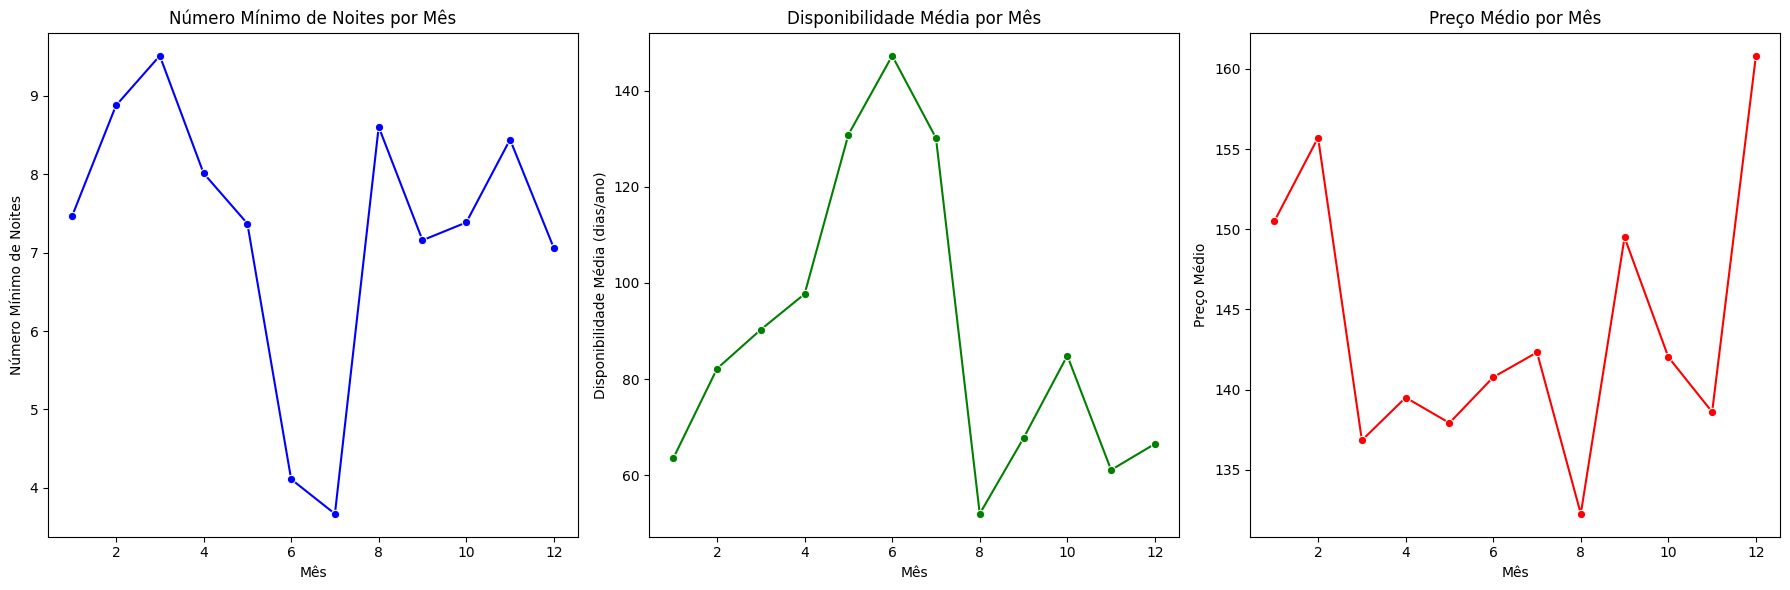

In [43]:
df['last_review'] = pd.to_datetime(df['ultima_review'], errors='coerce')
df['mes'] = df['last_review'].dt.month

mes_preco_disponibilidade = df.groupby('month').agg({
    'minimo_noites': 'mean',
    'disponibilidade_365': 'mean',
    'price': 'mean'
}).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

sns.lineplot(ax=axes[0], x='month', y='minimo_noites', data=mes_preco_disponibilidade, marker='o', color='b')
axes[0].set_title('Número Mínimo de Noites por Mês')
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Número Mínimo de Noites')

sns.lineplot(ax=axes[1], x='month', y='disponibilidade_365', data=mes_preco_disponibilidade, marker='o', color='g')
axes[1].set_title('Disponibilidade Média por Mês')
axes[1].set_xlabel('Mês')
axes[1].set_ylabel('Disponibilidade Média (dias/ano)')

sns.lineplot(ax=axes[2], x='month', y='price', data=mes_preco_disponibilidade, marker='o', color='r')
axes[2].set_title('Preço Médio por Mês')
axes[2].set_xlabel('Mês')
axes[2].set_ylabel('Preço Médio')

plt.tight_layout()
plt.show()


Este código transforma a coluna ultima_review do dataFrame em um formato de data, dessa forma extrai o mês e cria uma nova coluna **mes**. Em seguida, agrupa os dados por mês, calculando a média de minimo_noites, disponibilidade_365 e price. Posteriormente, criamos três gráficos de linha onde mostram o número mínimo de noites, a disponibilidade média e o preço médio por mês, sendo que cada gráfico está organizado com títulos e rótulos apropriados, e a figura é ajustada e exibida.


A análise das tendências mensais em relação ao número mínimo de noites, disponibilidade média e preço médio:

**Número Mínimo de Noites por Mês:**

Variação significativa ao longo dos meses, com picos em fevereiro, março, agosto e novembro acima de 8 noites e a média dos meses ficaram entre 7 noites, percebemos uma queda notável em junho e julho.

**Disponibilidade Média por Mês:**

Pico em junho (acima de 140 dias).

Queda significativa em agosto, indicando aumento nas reservas.


**Preço Médio por Mês:**

Flutuações ao longo do ano e um pico notável em dezembro (cerca de 160 dolares), podemos supor que é devido à alta demanda durante as festas de fim de ano ou férias.

Concluímos dessa forma que o número mínimo de noites não interfere no preço, mas a disponibilidade média por mês é um fator de grande impacto como pode ser visto no mês de dezembro que tem pouca disponibilidade afetando dessa forma o valor da diária.


####C.	Existe algum padrão no texto do nome do local para lugares de mais alto valor?

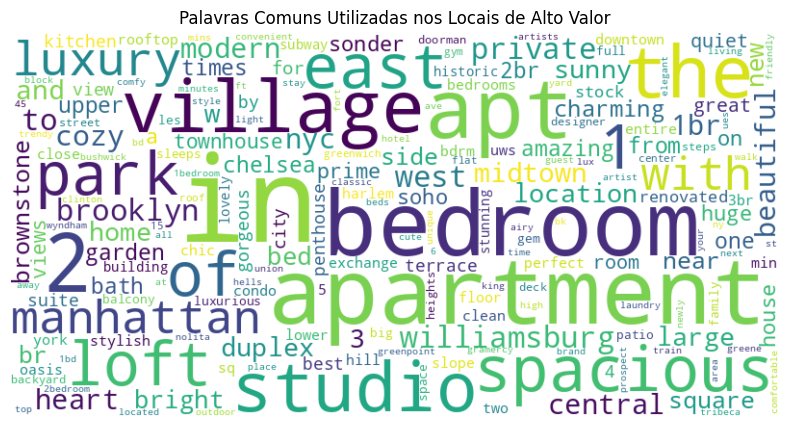

Palavras mais comuns em locais de alto valor:
in: 2746
apartment: 1492
bedroom: 1413
2: 1190
apt: 1183
village: 884
the: 878
studio: 794
spacious: 792
1: 791
of: 747
loft: 743
east: 738
park: 720
luxury: 690
with: 664
manhattan: 659
williamsburg: 595
brooklyn: 586
private: 570


In [42]:
from wordcloud import WordCloud
from collections import Counter

limite_valor_alto = df['price'].quantile(0.75)
locais_valor_alto = df[df['price'] >= limite_valor_alto]

locais_valor_alto.loc[:, 'nome'] = locais_valor_alto['nome'].fillna('')
locais_valor_alto.loc[:, 'nome'] = locais_valor_alto['nome'].str.replace('[^\w\s]', '', regex=True).str.lower()

palavras = ' '.join(locais_valor_alto['nome']).split()

palavras_frequentes = Counter(palavras)

nuvem_de_palavras = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(palavras_frequentes)

plt.figure(figsize=(10, 5))
plt.imshow(nuvem_de_palavras, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras Comuns Utilizadas nos Locais de Alto Valor')
plt.show()

palavras_mais_usadas = palavras_frequentes.most_common(20)
print("Palavras mais comuns em locais de alto valor:")
for palavra, frequencia in palavras_mais_usadas:
    print(f"{palavra}: {frequencia}")


Este código cria uma nuvem de palavras mais usadas nos locais de alto valor, filtrando os locais cujo preço é maior ou igual ao terceiro quartil de preços. Assim ele limpa e formata os nomes, conta a frequência das palavras, gerando a nuvem de palavras e exibe as palavras mais comuns.

A análise das palavras mais comuns nos nomes dos locais de alto valor revela tendências interessantes sobre o que torna esses locais atraentes:

 **Frequência das Palavras:**
  - Termos como "in," "apartment," "bedroom," e "apt" são comuns, descrevendo o tipo de propriedade.
  - Números como "2" e "1" indicam a quantidade de quartos nos locais.

**Palavras Descritivas:**
  - Termos como "village," "studio," "loft," e "1br" são frequentes, valorizando o estilo ou tamanho da propriedade.
  - "East" e "west" indicam a localização dentro da cidade como um fator relevante.

**Atributos de Luxo:**
  - Palavras como "luxury," "spacious," e "park" aparecem com alta frequência, indicando que características de luxo e espaço são valorizadas.
  - "Manhattan" e "Williamsburg" são áreas de alto valor em Nova York, destacando a importância da localização.

**Insights e Aplicações:**
- **Proprietários e Anunciantes:** Usar essas palavras-chave pode atrair potenciais clientes, melhorando a percepção de valor.
- **Viajantes:** Procurar essas palavras-chave pode garantir propriedades que atendam às expectativas de luxo e conveniência.
- **Mercado de Aluguel:** Ajustar estratégias de marketing e preços com base nas tendências observadas.

**Conclusão:**
A escolha das palavras certas pode impactar significativamente a percepção e o valor de um local. Palavras que sugerem luxo, espaço e localização estratégica são frequentemente associadas a preços mais elevados.

### 3.	Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['minimo_noites', 'disponibilidade_365', 'numero_de_reviews', 'reviews_por_mes', 'latitude', 'longitude']
categorical_features = ['room_type', 'bairro_group']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 164.2931250712738
MAE: 55.154957496136014
R²: 0.17773788797795853


Este código realiza a previsão de preços utilizando o algoritmo RandomForestRegressor. Primeiramente, importamos as bibliotecas necessárias e separa os dados em variáveis independentes (X) e dependente (y).

Posteriormente, dividimos os dados em conjuntos de treino e teste. Em seguida, identifica as características numéricas e categóricas, criando uma pipeline que inclui pré-processamento e regressão.

Treina o modelo com os dados de treino e faz previsões no conjunto de teste. Calcula e imprimindo as métricas de erro quadrático médio (RMSE), erro absoluto médio (MAE) e coeficiente de determinação (R²) para avaliar o desempenho do modelo.


Estamos resolvendo um problema de regressão, pois queremos prever um valor numérico (preço). Utilizamos nesse caso a Random Forest (Árvore de Decisão) para capturar relações não lineares e interações entre variáveis.

Como prós e contras podemos citar:

**Prós:** Bom desempenho com dados não lineares, menor necessidade de pré-processamento.

**Contras:** Pode ser propenso a overfitting se não for bem ajustado.

Com base nas métricas de performance obtidas:

   **RMSE (Root Mean Square Error):** 164.29 - Indica que a previsão de preço tem um erro médio de aproximadamente 164.29.
   
   **MAE (Mean Absolute Error):** 55.15 - Indica que a previsão de preço está off por cerca de 55.15.

   **R² (Coeficiente de Determinação):** 0.17 - Indica que o modelo explica apenas 17% da variabilidade dos preços dos aluguéis.

**Interpretando os Resultados:**
- RMSE: Um valor alto sugere a necessidade de melhorar a precisão do modelo.
- MAE: Embora menor que o RMSE, reforça a necessidade de ajustes no modelo.
- R²: Um valor muito baixo indica que o modelo não está capturando bem os padrões presentes nos dados.

**Sugestões de Próximos Passos para Melhorar o Modelo:**
- Engenharia de Features: Criar novas features, como interações entre latitude e longitude, agrupamento de categorias, dentre outros.
- Seleção de Modelos: Testar outros modelos de regressão, como Gradient Boosting (XGBoost, LightGBM).
- Validação Cruzada: Continuar utilizando para garantir que o modelo não está overfitting.
- Tratamento de Outliers: Verificar e tratar outliers que possam estar afetando a performance do modelo.


###4.	Supondo um apartamento com as seguintes características:



```
{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}
```



Qual seria a sua sugestão de preço?


In [39]:
def prever_preco(novo_apartamento):
    df_novo = pd.DataFrame([novo_apartamento])

    preco_previsto = model.predict(df_novo)[0]
    return preco_previsto

novo_apartamento = {
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

preco_sugerido = prever_preco(novo_apartamento)
print(f"Preço sugerido: ${preco_sugerido:.2f}")

Preço sugerido: $291.12



A previsão do preço utilizando um modelo de Random Forest estima $291,12 para o apartamento "Skylit Midtown Castle," considerando a localização em Manhattan, o tipo de quarto por ser Entire home/Apt (Casa inteira/Apartamento) e a alta disponibilidade influenciam no alto valor.

**Considerações Finais:**
- Características de Luxo e Localização Premium: Contribuem significativamente para o preço elevado.
- Alta Disponibilidade: 355 dias no ano, afetando a demanda e o preço.
- Número de Reviews: 45 reviews, indicando boa avaliação e confiabilidade.



###5.	Salve o modelo desenvolvido no formato .pkl.

In [40]:
import joblib

# Salvar o modelo, utilizamos o compress para reduzir o tamanho do arquivo e poder fazer o upload no GitHub
joblib.dump(model, 'modelo_previsao_preco.pkl', compress=7)


['modelo_previsao_preco.pkl']